Importing Liabraries

In [1]:
import numpy as np
import pandas as pd

Data

In [2]:
historical_data=pd.read_csv('/content/historical_data (1).csv')

/tmp/ipython-input-553474761.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  historical_data=pd.read_csv('/content/historical_data (1).csv')


In [3]:
fear_greed_index=pd.read_csv('/content/fear_greed_index (1).csv')

In [5]:
historical_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,895000000000000.0,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,443000000000000.0,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,660000000000000.0,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1080000000000000.0,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1050000000000000.0,1.730000e+12


In [7]:
fear_greed_index.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


Combining Data

In [9]:
historical_data['Timestamp'] = pd.to_datetime(historical_data['Timestamp'], unit='ms')

# Extract only the date
historical_data['Date'] = historical_data['Timestamp'].dt.date

# Ensure sentiment dataset has proper date
fear_greed_index['Date'] = pd.to_datetime(fear_greed_index['date']).dt.date

In [26]:
merged = pd.merge(
    historical_data,
    fear_greed_index,
    on='Date',
    how='left'
)

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
merged['direction']=le.fit_transform(merged['Direction'])
merged['side']=le.fit_transform(merged['Side'])
merged['coin']=le.fit_transform(merged['Coin'])

In [28]:
merged.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Trade ID,Timestamp,Date,timestamp,value,classification,date,direction,side,coin
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,...,895000000000000.0,2024-10-27 03:33:20,2024-10-27,1.730007e+09,74.0,Greed,2024-10-27,1,0,1
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,...,443000000000000.0,2024-10-27 03:33:20,2024-10-27,1.730007e+09,74.0,Greed,2024-10-27,1,0,1
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,...,660000000000000.0,2024-10-27 03:33:20,2024-10-27,1.730007e+09,74.0,Greed,2024-10-27,1,0,1
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,...,1080000000000000.0,2024-10-27 03:33:20,2024-10-27,1.730007e+09,74.0,Greed,2024-10-27,1,0,1
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,...,1050000000000000.0,2024-10-27 03:33:20,2024-10-27,1.730007e+09,74.0,Greed,2024-10-27,1,0,1


In [30]:
merged['Sentiment'] = merged['classification'].map({'Fear': 0, 'Greed': 1})

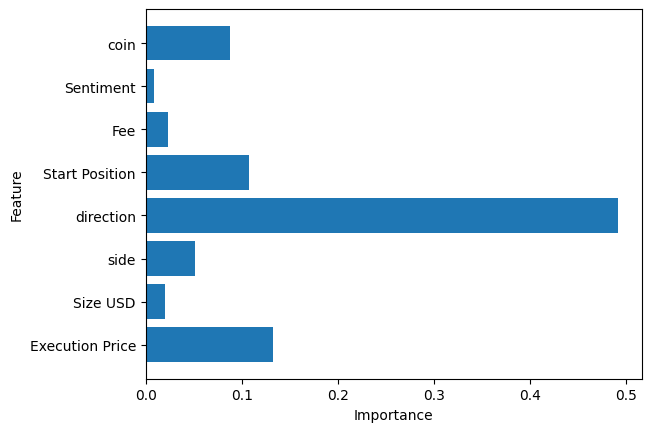

In [31]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

X = merged[['Execution Price','Size USD','side','direction',
            'Start Position','Fee','Start Position','Sentiment','coin']]
y = (merged['Closed PnL'] > 0).astype(int)

model = RandomForestClassifier()
model.fit(X, y)


importances = model.feature_importances_
features = X.columns

plt.barh(features, importances)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [54]:
model=RandomForestClassifier(n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    random_state=42)

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [56]:
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=200,
                       random_state=42)

In [57]:
y_pred=model.predict(x_test)

In [58]:
from sklearn.metrics import accuracy_score
accu=accuracy_score(y_test,y_pred)

In [59]:
print("The accuracy for the model is",accu)

The accuracy for the model is 0.9646791187739464


In [47]:
train_accu=accuracy_score(y_train,model.predict(x_train))
test_accu=accuracy_score(y_test,model.predict(x_test))
print("the train accu is",train_accu)
print("the test accu is",test_accu)

the train accu is 1.0
the test accu is 0.9870689655172413


Scaling

In [48]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [60]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)


In [61]:
model.fit(x_train_scaled,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=200,
                       random_state=42)

In [52]:
y_pred_scaled=model.predict(x_test_scaled)

In [62]:
train_accu=accuracy_score(y_train,model.predict(x_train_scaled))
test_accu=accuracy_score(y_test,model.predict(x_test_scaled))
print("the train accu is",train_accu)
print("the test accu is",test_accu)

the train accu is 0.9662655651340997
the test accu is 0.8641044061302682
